# Trabajo semanal 11

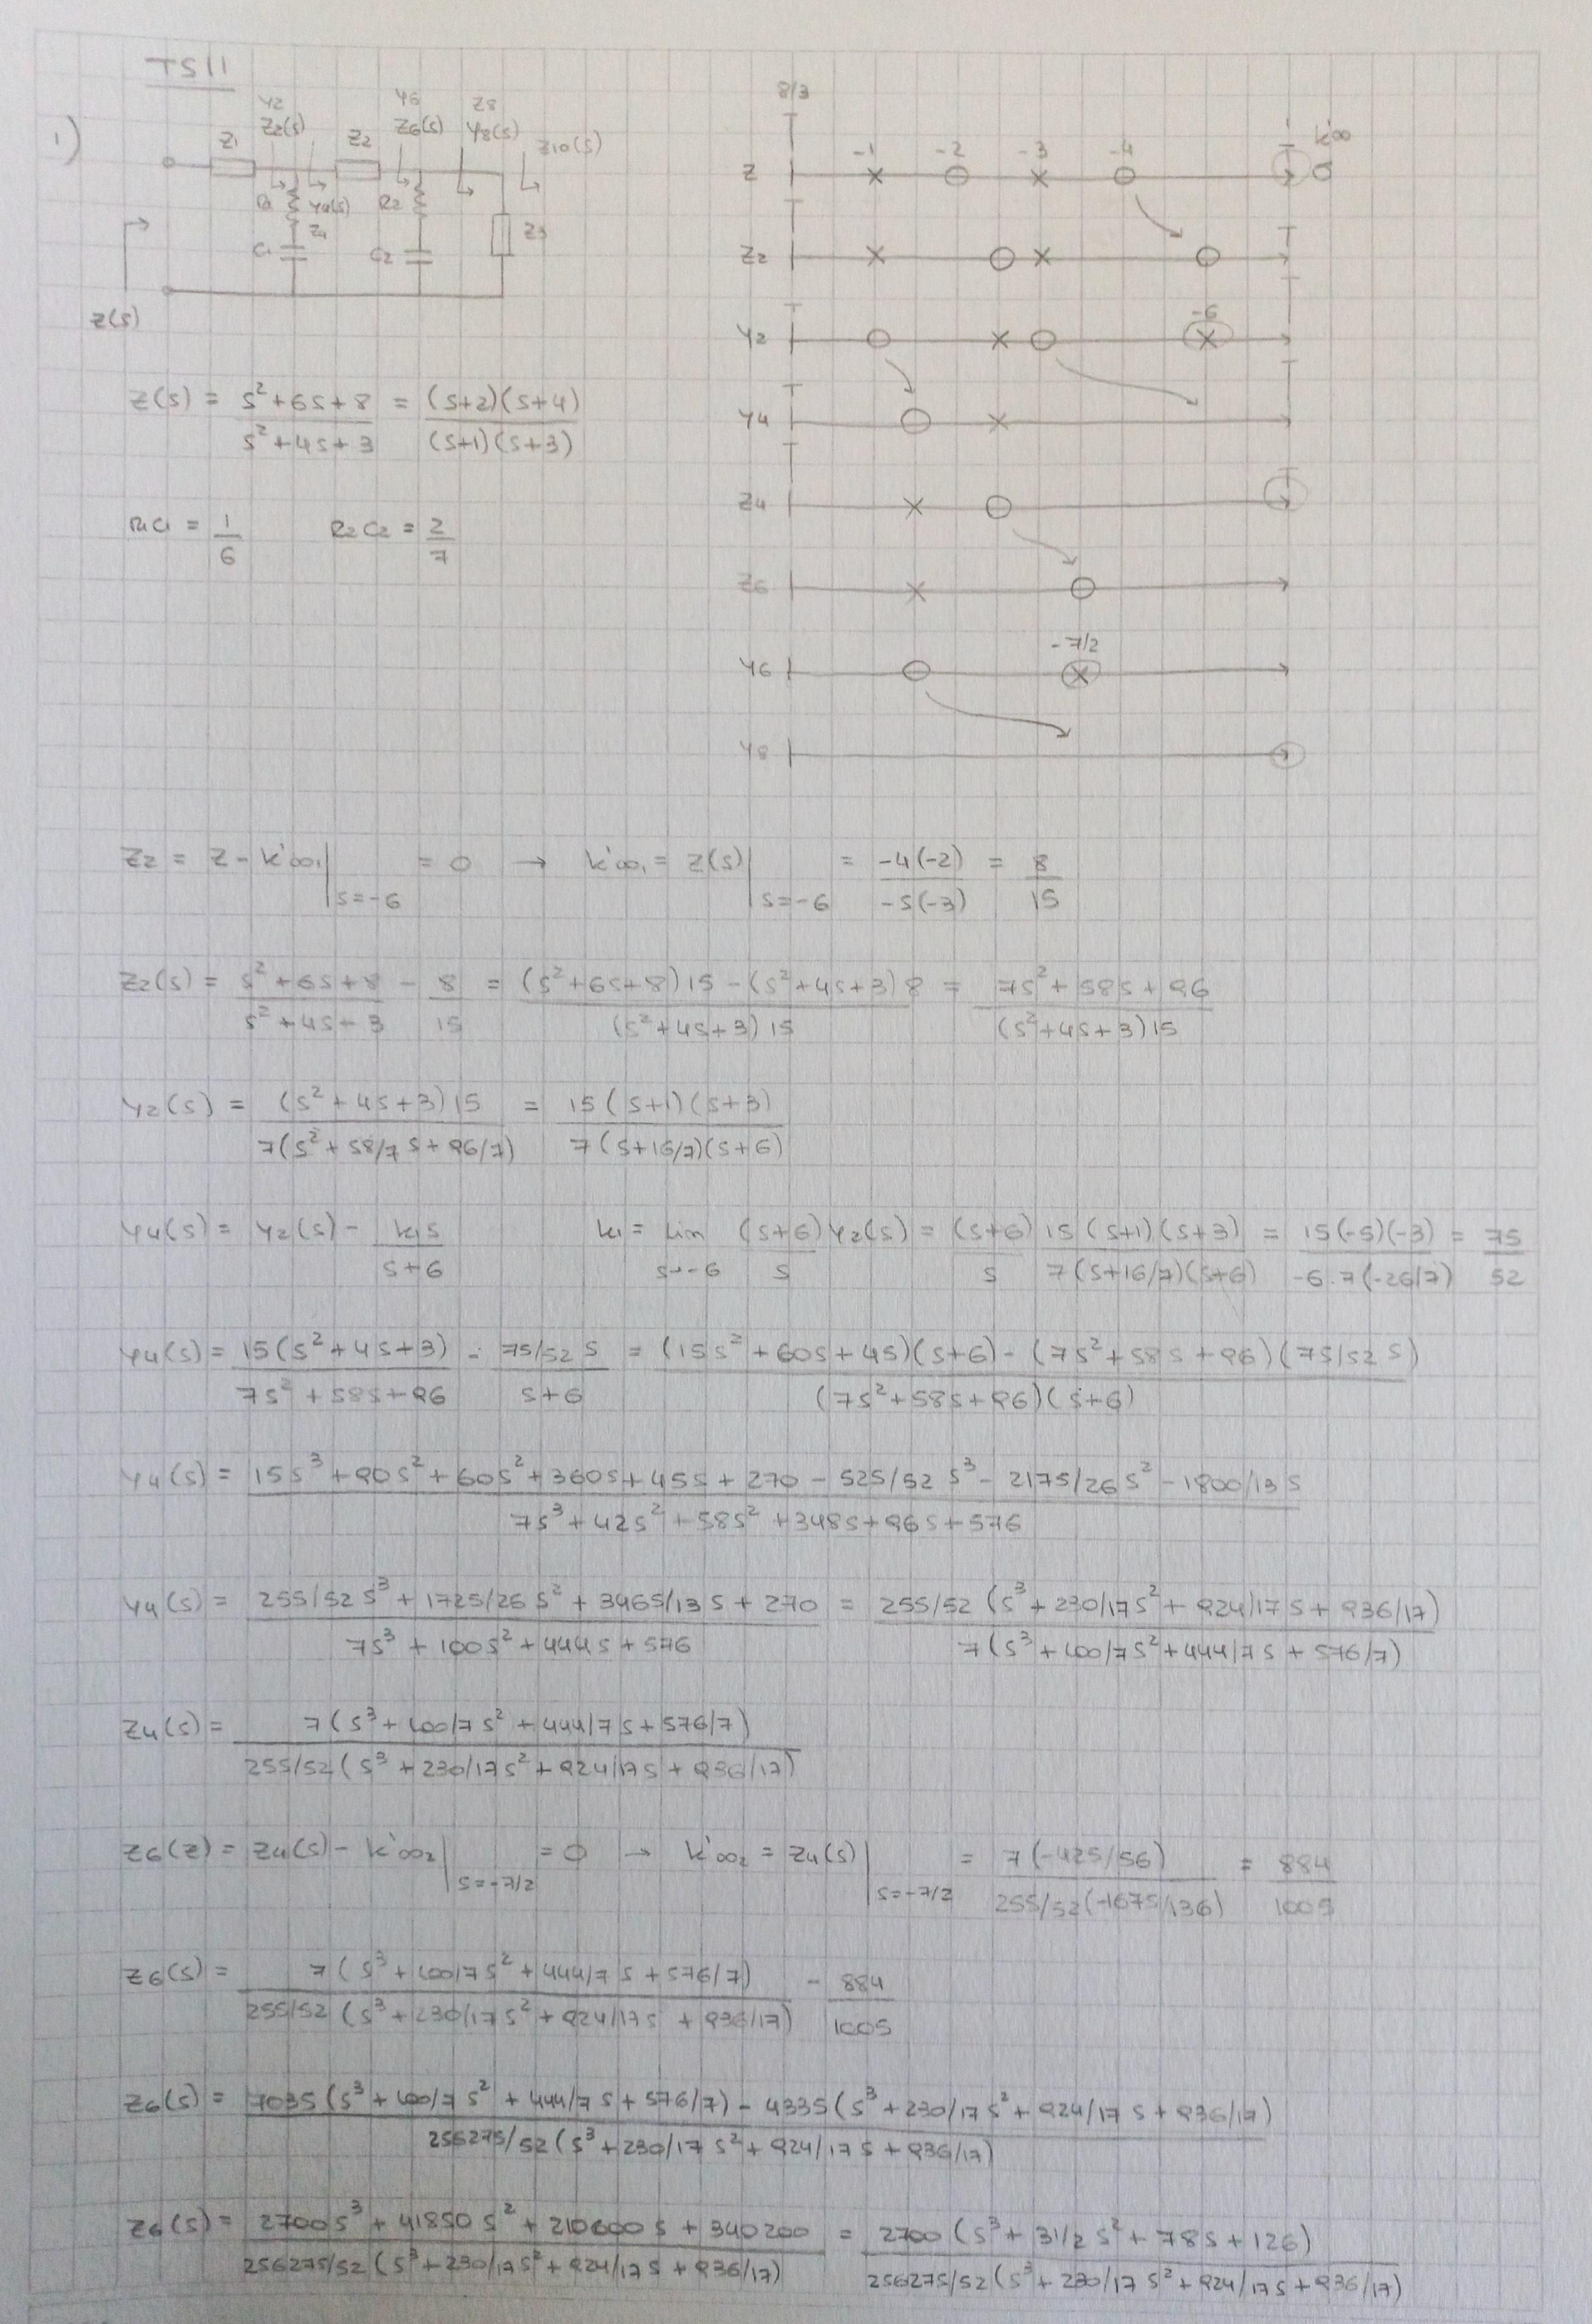

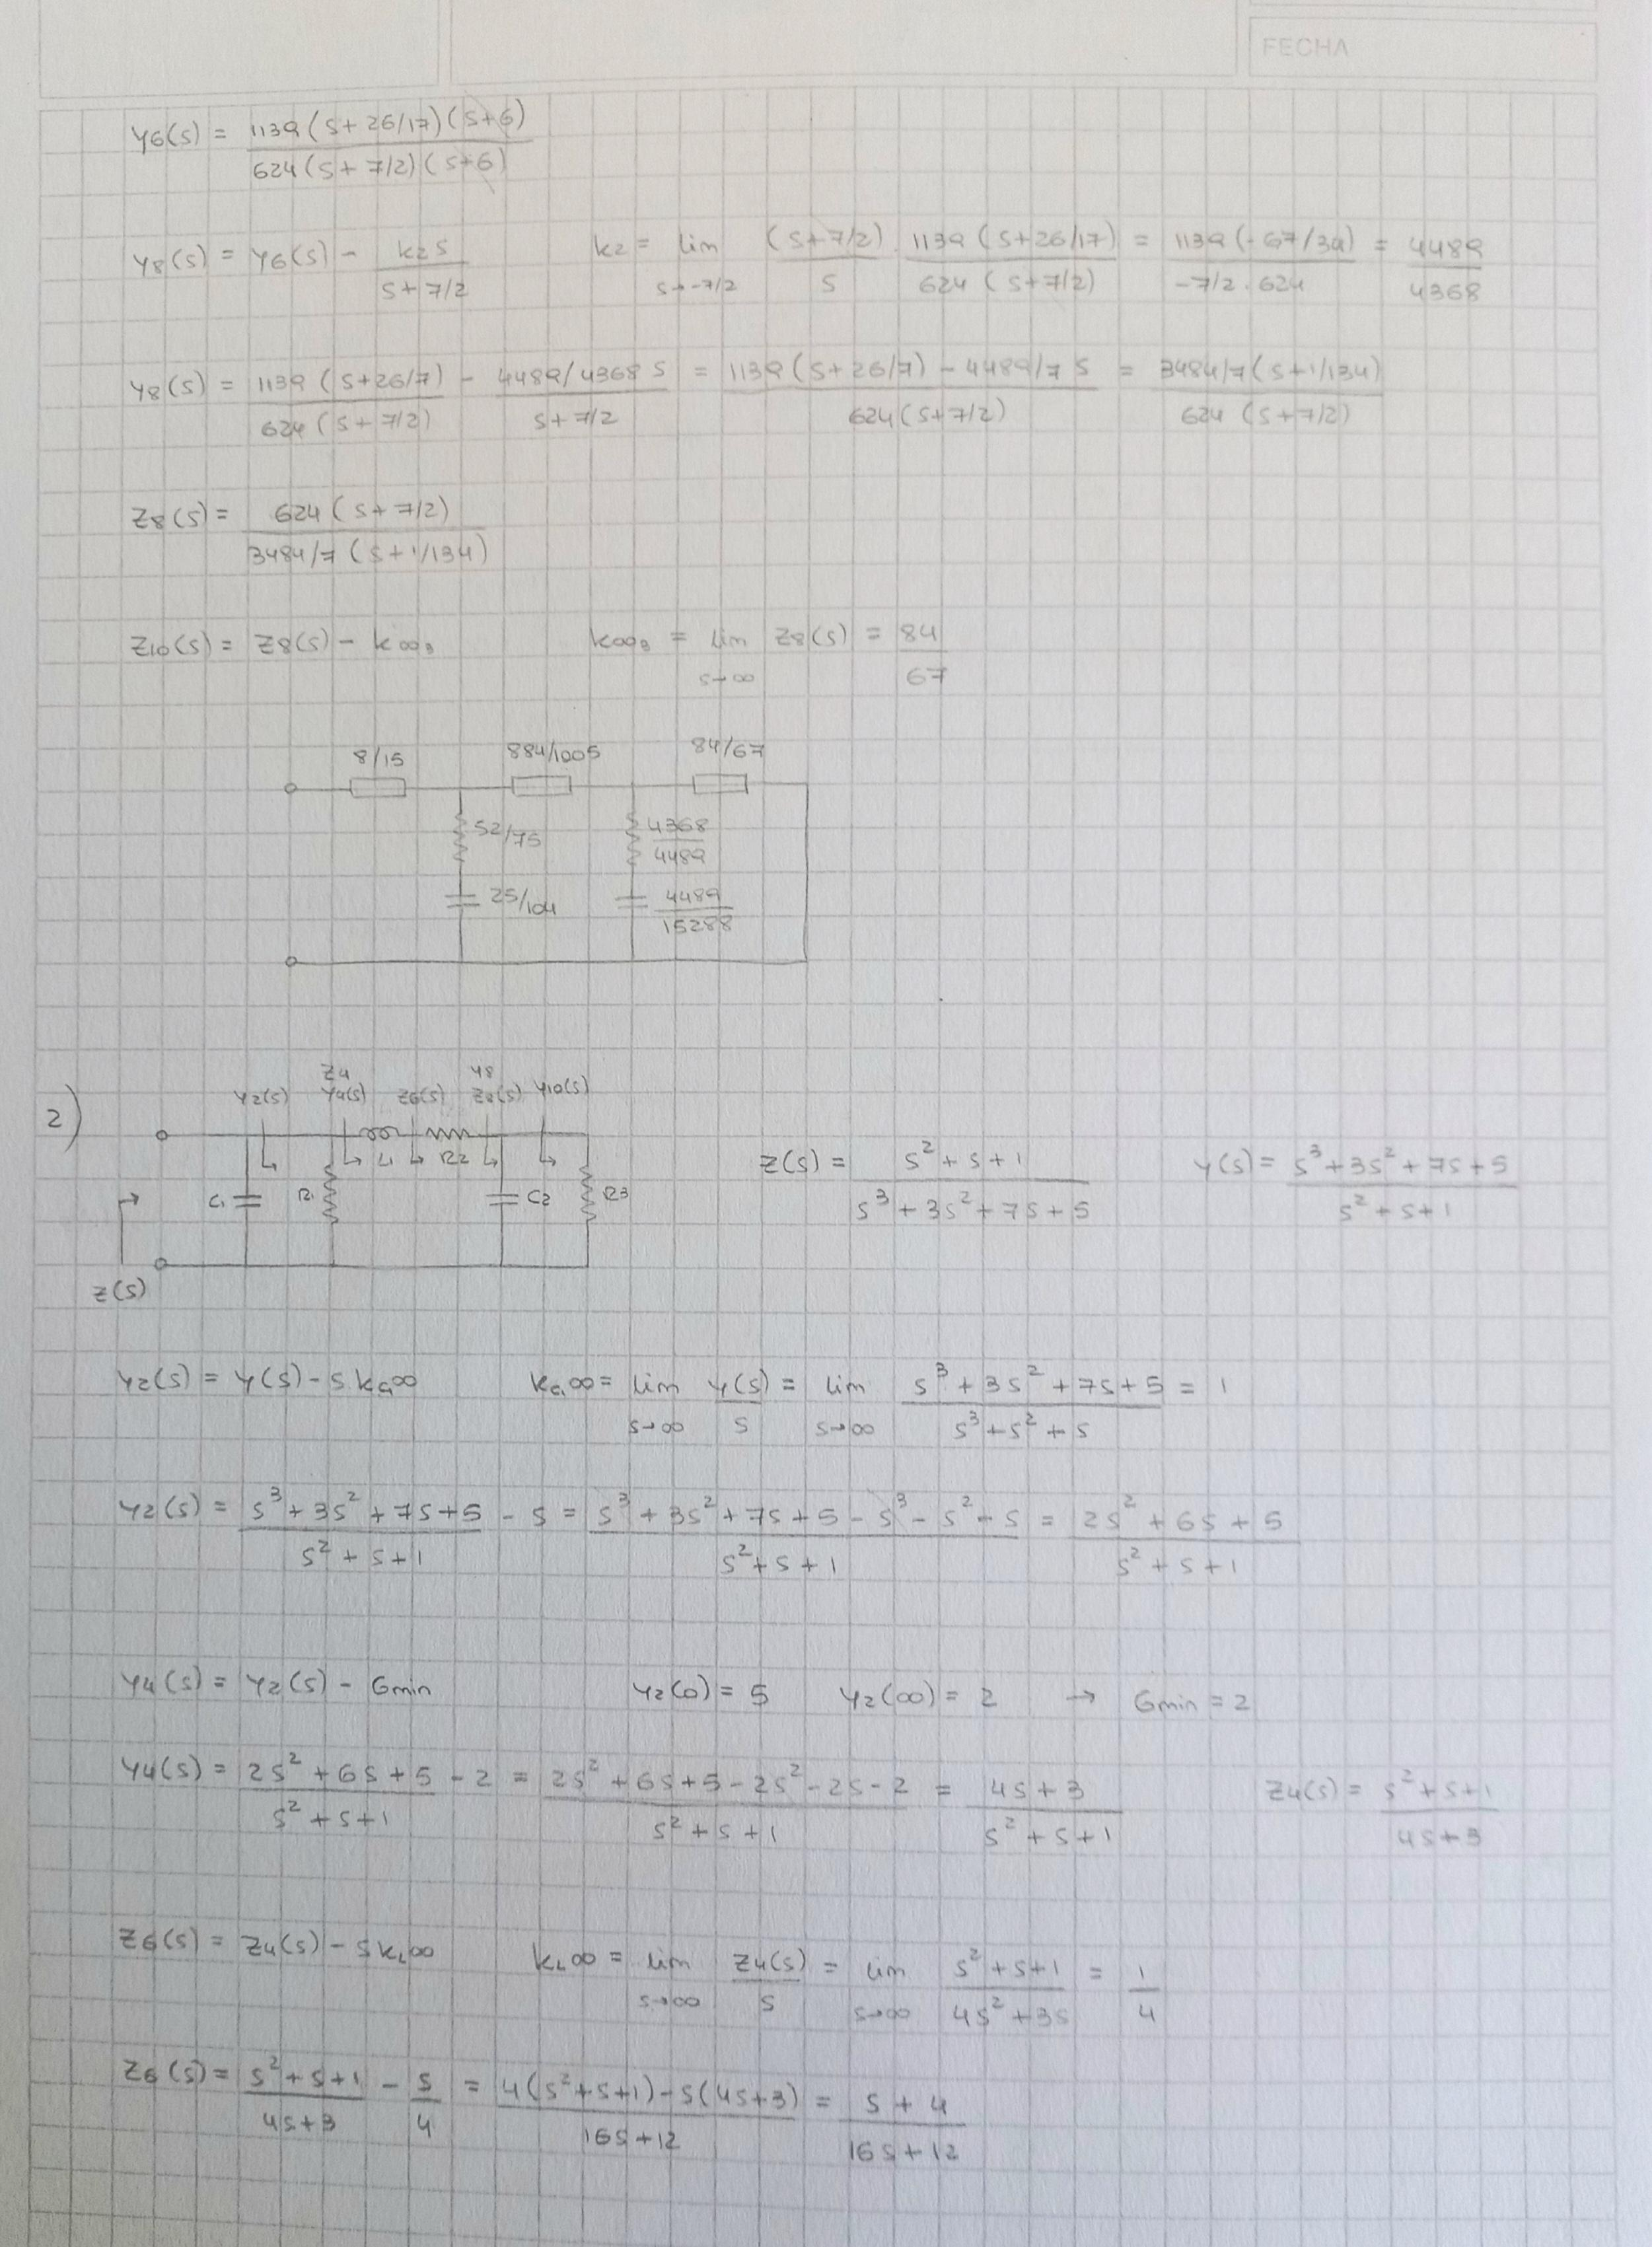

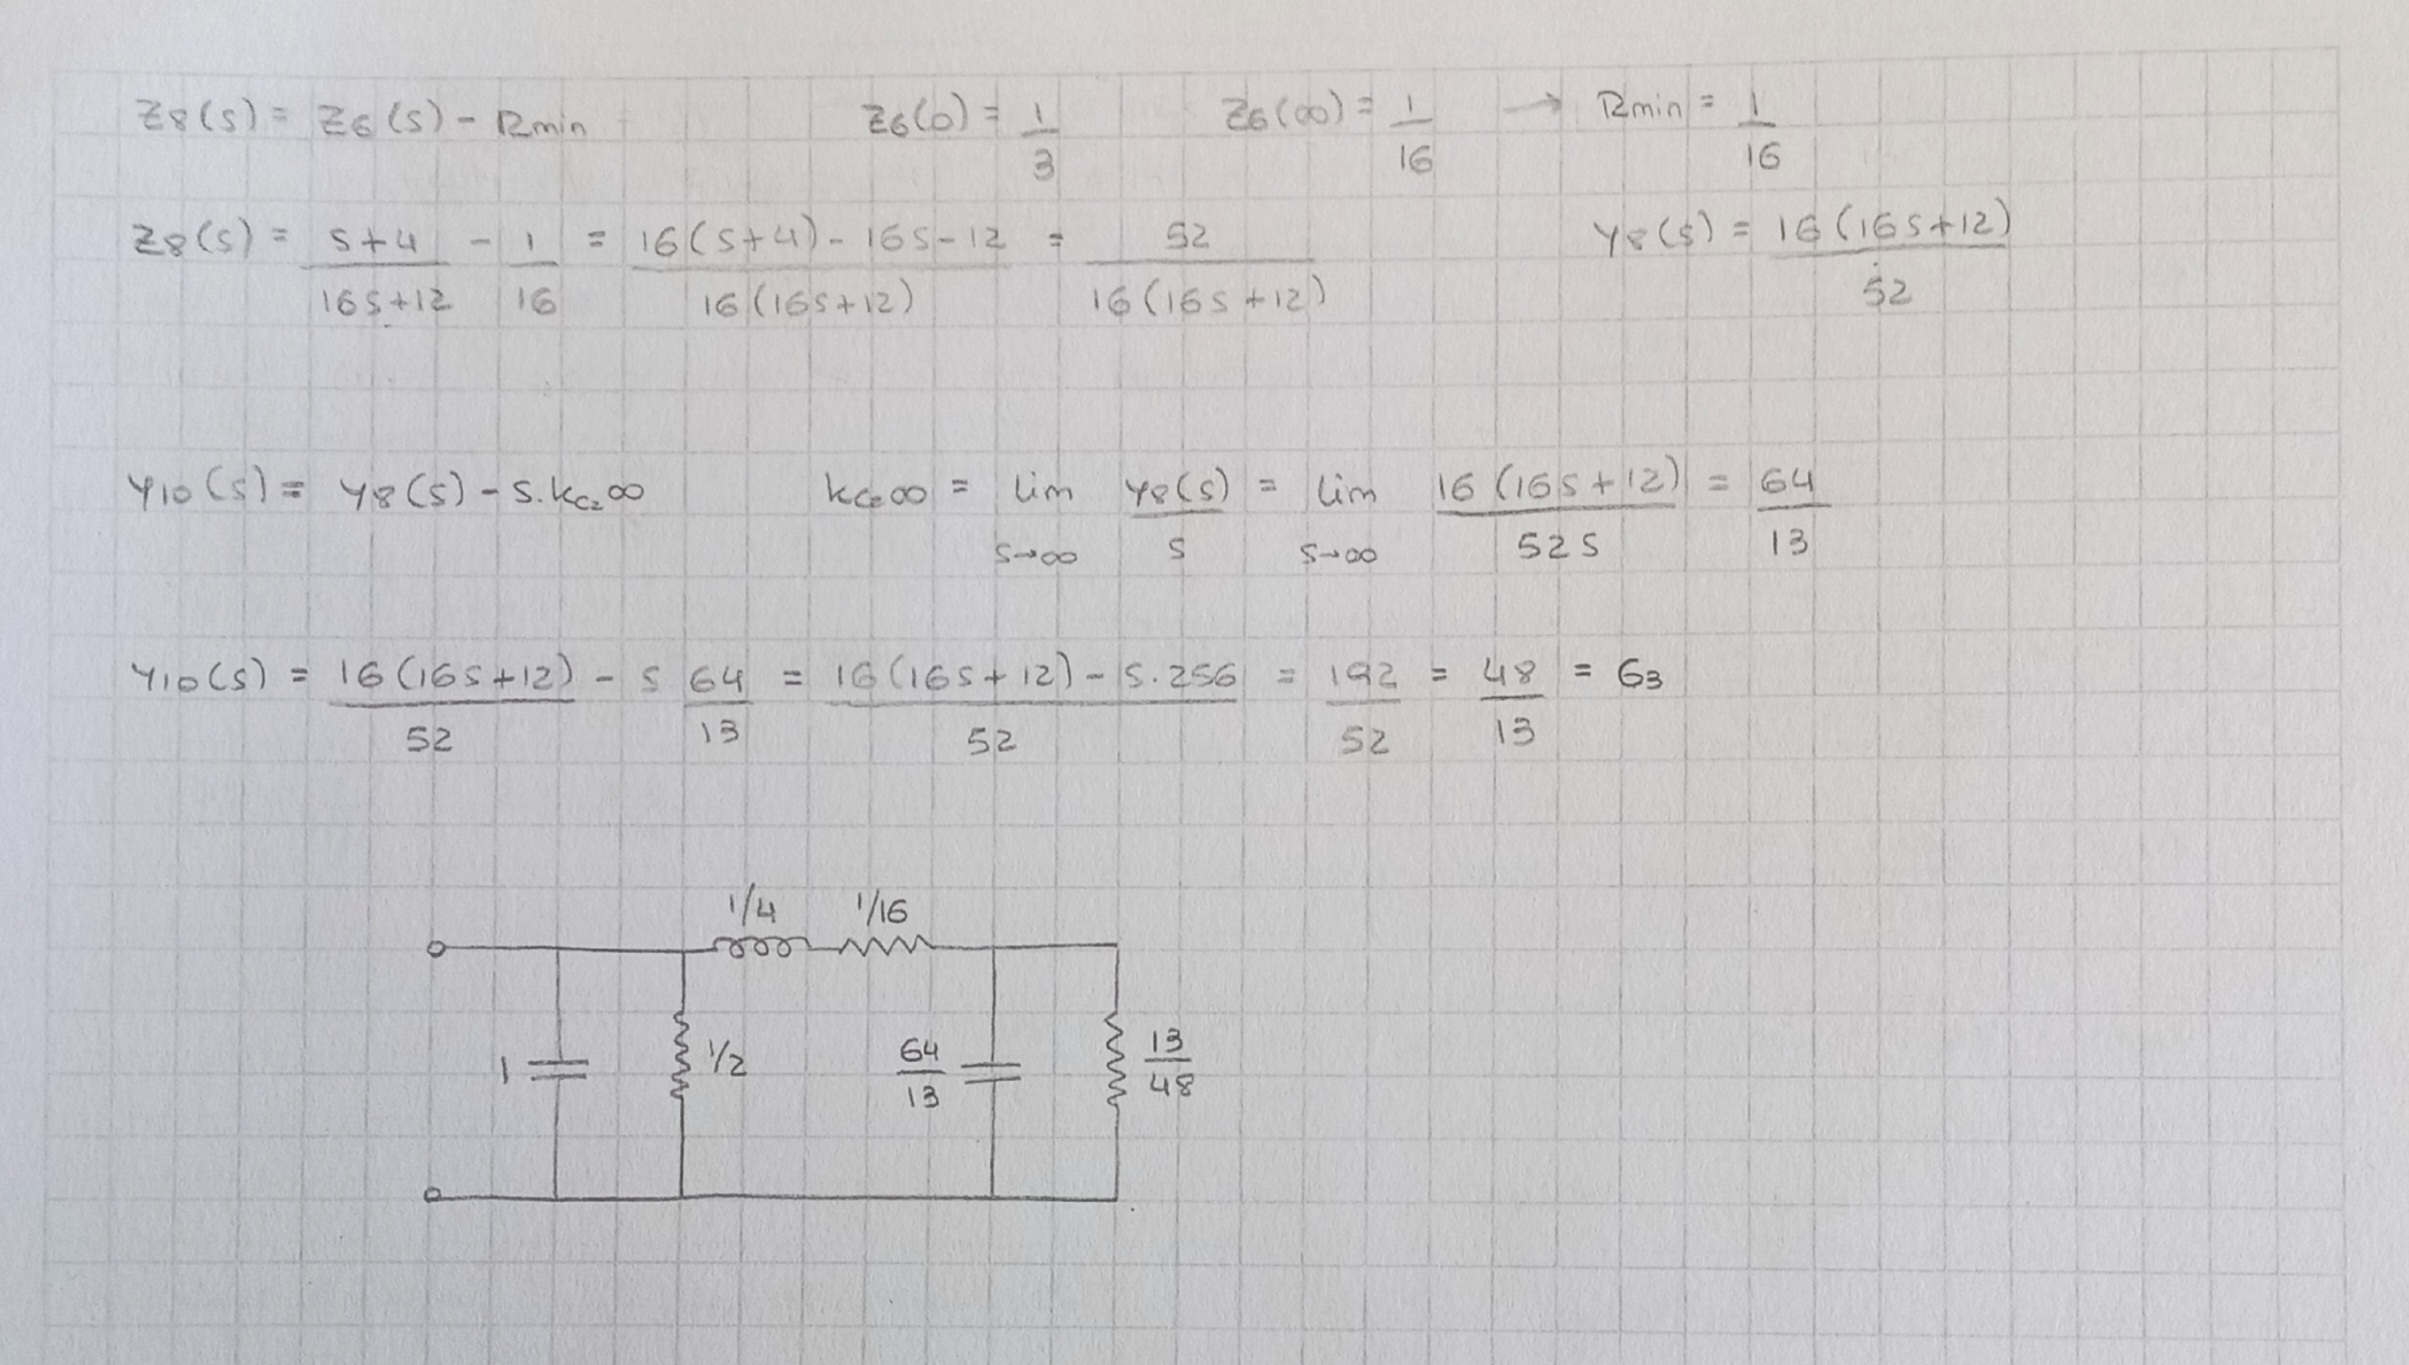